In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/Ataullha/Demo-Dataset/refs/heads/main/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


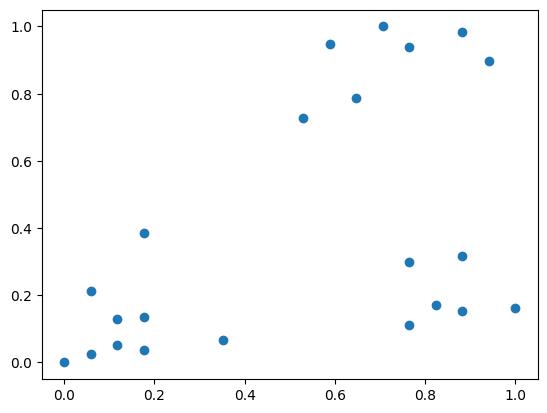

In [48]:
df['Income($)'] = ((df['Income($)'] - df['Income($)'].min()) / (df['Income($)'].max() - df['Income($)'].min()))
df['Age'] = ((df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min()))
plt.scatter(df['Age'], df['Income($)'])

In [49]:
from sklearn.cluster import  KMeans

In [50]:
# SSE -> Sum Square Error

sse = []

for k in range(1, 12):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

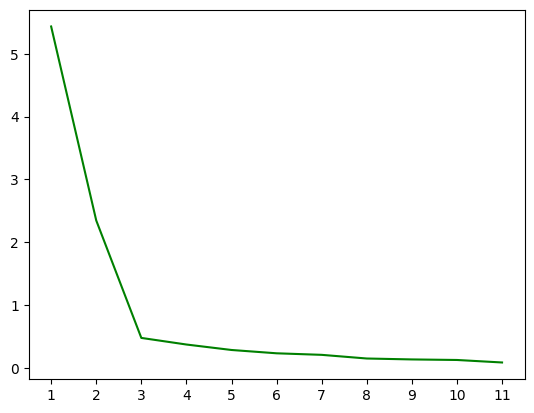

In [51]:
plt.plot(range(1,12), sse, color='green')
plt.xticks(range(1,12))
plt.show()

In [52]:
km = KMeans(n_clusters=3, random_state=42)
km

KMeans(n_clusters=3, random_state=42)

In [53]:
cluster_array = km.fit_predict(df[['Age', 'Income($)']])
cluster_array

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [54]:
df['Cluster'] = cluster_array 
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [55]:
df0 = df[df['Cluster']==0]
df1 = df[df['Cluster']==1]
df2 = df[df['Cluster']==2]
df2

,Name,Age,Income($),Cluster
16,Dipika,0.823529,0.170940,2
17,Priyanka,0.882353,0.153846,2
18,Nick,1.000000,0.162393,2
19,Alia,0.764706,0.299145,2
20,Sid,0.882353,0.316239,2
21,Abdul,0.764706,0.111111,2


In [56]:
centriods_axis = km.cluster_centers_

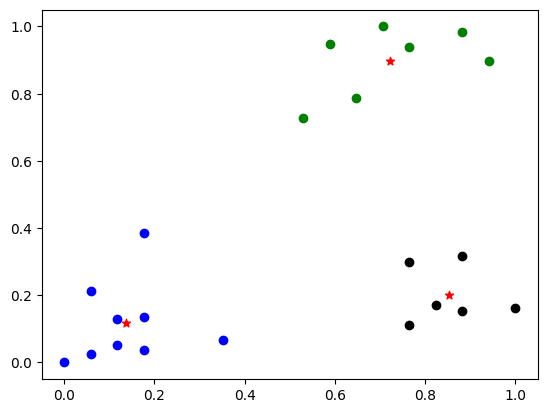

In [ ]:
plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='blue')
plt.scatter(df2['Age'], df2['Income($)'], color='black')
plt.scatter(centriods_axis[:,0], centriods_axis[:,1], marker='*', color='red', label='Centroids')